## Ананьев Роман


# Лаборатоная работа №12
### Регрессионный анализ: линейная по параметрам регрессионная модель общего вида
### Вариант 17

In [1]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression 
%matplotlib inline 

# Задание 1
<!-- 1) Постройте диаграмму рассеивания и проанализируйте ее с точ-
ки зрения наличия и характера связи между компонентами выборочного
вектора. Оправдано ли для описания зависимости использовать модель
2
0 1 2 Y x x E        ? Если вы считаете, что не оправдано, то для вы-
полнения следующих заданий используйте иную линейную регрессион-
ную модель общего вида (но обязательно отличную от 0 1 y x     ), и
далее корректируйте действия п. 2) – 6) в соответствии с выбранной
вами моделью.
2) Считая, что 2
[ | ] M Y x x x     , найдите оценки парамет-
0 1 2
2
ров модели
0 1 2 y x x     (непосредственно по формулам, без ис-
пользования специализированных функций языка программирования
Python).
3) Нанесите график построенного в п. 2 уравнения регрессии на
диаграмму рассеивания.
4) В предположении, что ошибки наблюдений не коррелированы и
имеют нормальное распределение  
N  , оцените качество аппрок-
0 ,
симации результатов наблюдения уравнением регрессии
2
0 1 2 y x x     :
а) проверьте значимость модели на уровне   ;
0,05
б) найдите точечные оценки дисперсии ошибок наблюдений и ко-
вариационной матрицы;
в) определите доверительные интервалы для параметров модели и
дисперсии ошибок наблюдений при уровне значимости   .
0,05
5) Для изучения вопроса об адекватности построенной модели про-
анализируйте остатки (выборку значений случайных ошибок наблюде-
ний – разностей между наблюдаемыми значениями i y и вычисленными -->

### 1.1

In [2]:
sample = pd.read_excel("Data_12_1.xlsx", header=0)
X = sample['Вариант 17']
Y = sample['Unnamed: 50']

In [3]:
X

0       9.412469
1       8.416779
2       4.523603
3      11.437645
4       9.155008
         ...    
105          NaN
106          NaN
107          NaN
108          NaN
109          NaN
Name: Вариант 17, Length: 110, dtype: float64

In [4]:
index = next((i for i, x in enumerate(X) 
             if x == 'NaN' 
             or (isinstance(x, float) and np.isnan(x))
             or x == 'nan'), None)

index

97

In [5]:
X = X[0:97]
Y = Y[0:97]

In [6]:
np.polyfit(np.array(X), np.array(Y), deg=2)

array([ 1.18684181, -6.20217881, 14.4425252 ])

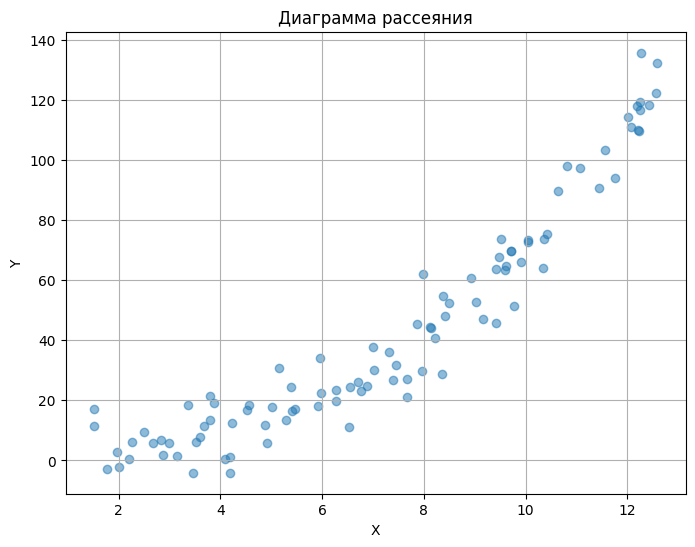

In [7]:
plt.figure(figsize=(8, 6))
plt.scatter(X, Y, alpha=0.5)
plt.title("Диаграмма рассеяния")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()

### 1.2

In [8]:
n = len(X)
A = np.zeros((3, n))
A[0] = [1] * n
A[1] = X
A[2] = [x**2 for x in X]
Y = np.array(Y).reshape(-1, 1)
B = np.dot(np.dot(np.linalg.inv(np.dot(A, A.T)), A), Y)
B

array([[14.4425252 ],
       [-6.20217881],
       [ 1.18684181]])

### 1.3

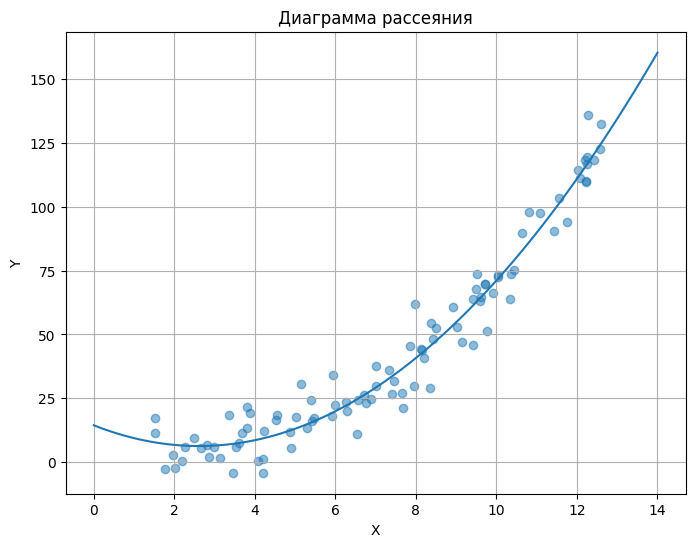

In [9]:
def f(x):
    return B[0] + B[1] * x + B[2] * x**2
x = np.linspace(0, 14, 100)


plt.figure(figsize=(8, 6))
plt.scatter(X, Y, alpha=0.5)
plt.plot(x, f(x))
plt.title("Диаграмма рассеяния")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()

### 1.4

In [10]:
"H0: B1 = B2 = 0, H1 = не H0"
Y_pred = np.array(f(X))

Qe = np.sum((Y.flatten() - Y_pred)**2)

Qr = np.dot(np.dot(B.T, A), Y) - n * np.mean(Y)**2
p = 2
F = (Qr / p) / (Qe / (n - p - 1))
print(F[0][0])

# Критическое значение F (α=0.05)
F_crit = sts.f.ppf(0.95, p, n - p - 1)

print(f"F-статистика = {F[0][0]:.3f}")
print(f"Критическое F (α=0.05) = {F_crit:.3f}")
if F > F_crit:
    print("Модель значима (отвергаем H₀)")
else:
    print("Модель незначима (не отвергаем H₀)")

1083.8176096131376
F-статистика = 1083.818
Критическое F (α=0.05) = 3.093
Модель значима (отвергаем H₀)


In [11]:
s2 = Qe / (n - p - 1)
s2

np.float64(61.18608477898836)

In [12]:
s = np.sqrt(s2)
s

np.float64(7.822153461738549)

In [13]:
K = s2 * np.linalg.inv(np.dot(A, A.T))
K

array([[ 1.53260645e+01, -4.45825390e+00,  2.79556450e-01],
       [-4.45825390e+00,  1.46159815e+00, -9.73888594e-02],
       [ 2.79556450e-01, -9.73888594e-02,  6.76865740e-03]])

In [14]:
SE = np.sqrt(np.diag(K))

# Критическое значение t-распределения (α=0.05, двусторонний)
alpha = 0.05
t_crit = sts.t.ppf(1 - alpha/2, df=n-p-1)

# Доверительные интервалы
conf_intervals = []
for i in range(len(B)):
    lower = B[i] - t_crit * SE[i]
    upper = B[i] + t_crit * SE[i]
    conf_intervals.append((lower, upper))
print("Коэффициенты:")
print(f"B0 = {float(B[0][0]):.3f}, 95% ДИ: [{conf_intervals[0][0][0]:.3f}, {conf_intervals[0][1][0]:.3f}]")
print(f"B1 = {float(B[1][0]):.3f}, 95% ДИ: [{conf_intervals[1][0][0]:.3f}, {conf_intervals[1][1][0]:.3f}]")
print(f"B2 = {float(B[2][0]):.3f}, 95% ДИ: [{conf_intervals[2][0][0]:.3f}, {conf_intervals[2][1][0]:.3f}]")

Коэффициенты:
B0 = 14.443, 95% ДИ: [6.669, 22.216]
B1 = -6.202, 95% ДИ: [-8.603, -3.802]
B2 = 1.187, 95% ДИ: [1.023, 1.350]


### 1.6

In [15]:
res = Y.flatten() - Y_pred

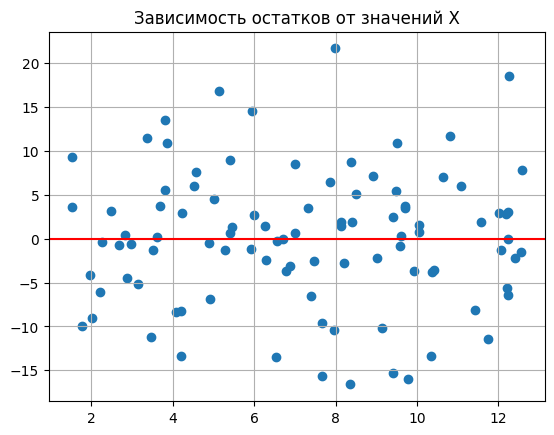

In [16]:
plt.scatter(X, res)
plt.grid(1)
plt.axhline(0, color = 'r')
plt.title("Зависимость остатков от значений X")
plt.show()

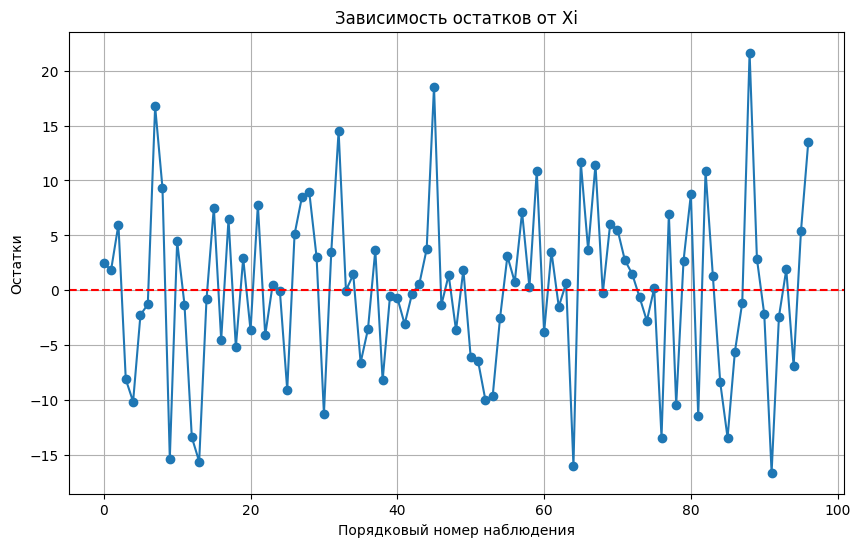

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(res, 'o-')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Зависимость остатков от Xi')
plt.xlabel('Порядковый номер наблюдения')
plt.ylabel('Остатки')
plt.grid(True)
plt.show()

In [18]:
shapiro_test = sts.shapiro(res)
print(f"Shapiro-Wilk test: W = {shapiro_test[0]:.4f}, p-value = {shapiro_test[1]:.4f}")

Shapiro-Wilk test: W = 0.9878, p-value = 0.5174


<Figure size 1000x600 with 0 Axes>

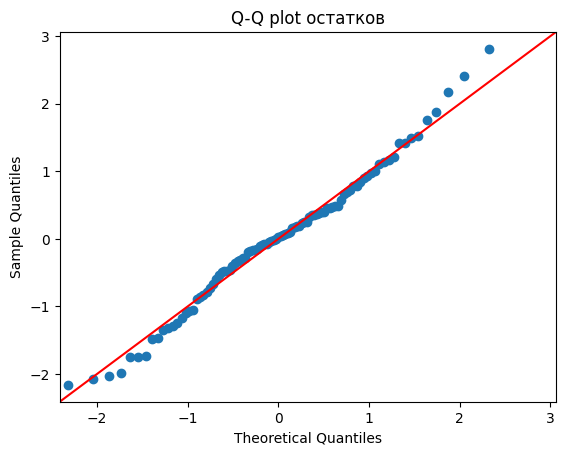

In [19]:
import statsmodels.api as sm


plt.figure(figsize=(10, 6))
sm.qqplot(res, line='45', fit=True)
plt.title('Q-Q plot остатков')
plt.show()

# Задание 2
<!-- 1) Используйте для описания статистической зависимо-
сти компонент того же выборочного вектора модель 0 1 y x     (вы-
полните действия, аналогичные перечисленным в задании 1).
2) Сопоставьте характеристики построенной регрессионной моде-
ли с характеристиками регрессионной модели задания 1. Можно ли
утверждать, что какая-то из моделей предпочтительней в использова-
нии? -->

### 2.1

In [20]:
X = np.array(X).reshape(-1, 1)
model = LinearRegression()
model.fit(X, Y)
a = model.intercept_  
b = model.coef_[0]
X = X.flatten()
print(f"a = {a}, b = {b}")

a = [-34.57595281], b = [10.87434958]


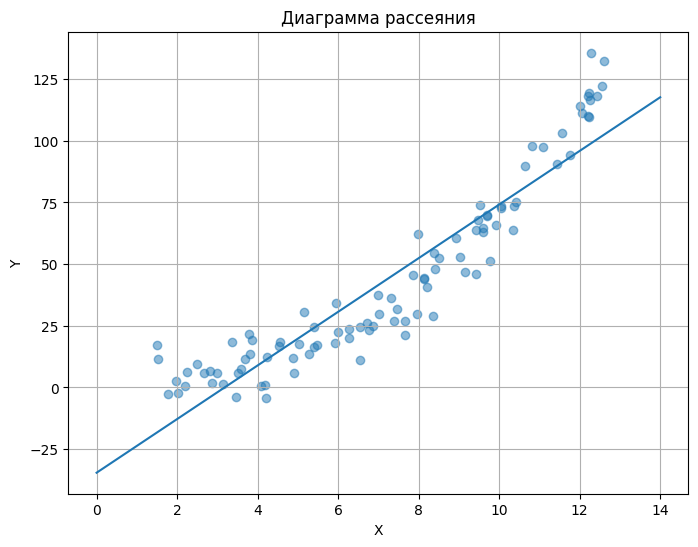

In [21]:
def f1(x):
    return a + b * x
x = np.linspace(0, 14, 100)


plt.figure(figsize=(8, 6))
plt.scatter(X, Y, alpha=0.5)
plt.plot(x, f1(x))
plt.title("Диаграмма рассеяния")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()

### 2.2

In [22]:
X = np.array(X).reshape(-1, 1)

Y_pred = model.predict(X)

# Остатки
residuals = Y - Y_pred

# Оценка дисперсии ошибок
n = len(Y)
s_squared = np.sum(residuals**2) / (n - 2)

print(f"Оценка дисперсии ошибок s² = {s_squared:.4f}")
print(f"Коэффициент детерминации R² = {model.score(X, Y)}")

Оценка дисперсии ошибок s² = 194.5752
Коэффициент детерминации R² = 0.8664217384701733


In [23]:
s = np.sqrt(s_squared)
X_mean = np.mean(X)
X_centered = X - X_mean
sum_X_centered_sq = np.sum(X_centered**2)

SE_a = s * np.sqrt(1/n + X_mean**2/sum_X_centered_sq)
SE_b = s / np.sqrt(sum_X_centered_sq)

# Критическое значение t-распределения
alpha = 0.05  # 95% доверительный интервал
t_crit = sts.t.ppf(1 - alpha/2, n - 2)

# Доверительные интервалы
CI_a = (a - t_crit * SE_a, a + t_crit * SE_a)
CI_b = (b - t_crit * SE_b, b + t_crit * SE_b)

print(f"Доверительный интервал для свободного члена (a): {CI_a}")
print(f"Доверительный интервал для коэффициента наклона (b): {CI_b}")

Доверительный интервал для свободного члена (a): (array([-41.45890635]), array([-27.69299927]))
Доверительный интервал для коэффициента наклона (b): (array([10.00466827]), array([11.74403088]))


Доверительный интервал для коэффициента наклона (b) на уровне значимости 0.05 не включает 0 => гипотеза b = 0 отвергнута => регрессионная модель значима

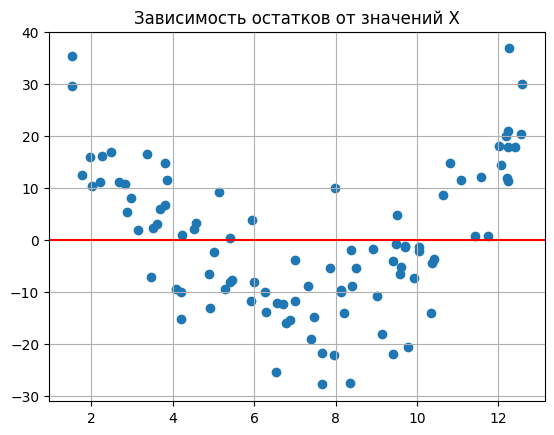

In [24]:
plt.scatter(X, residuals)
plt.grid(1)
plt.axhline(0, color = 'r')
plt.title("Зависимость остатков от значений X")
plt.show()

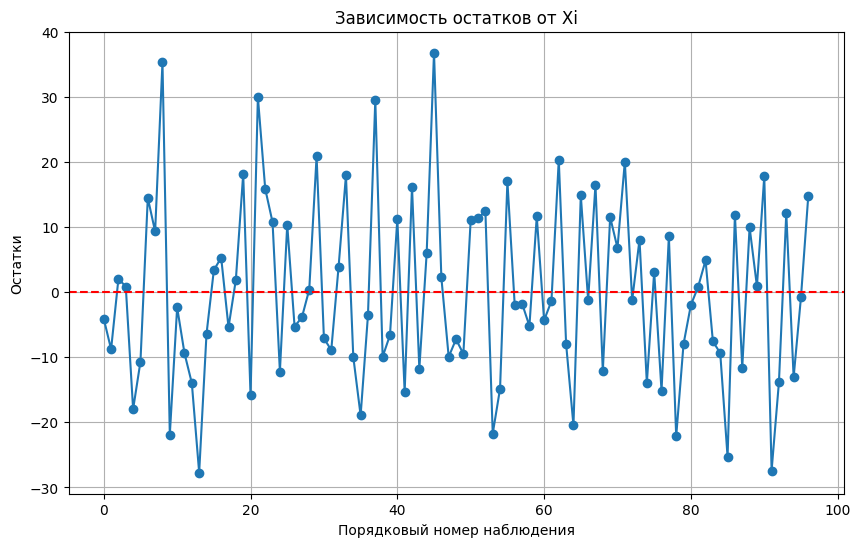

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(residuals, 'o-')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Зависимость остатков от Xi')
plt.xlabel('Порядковый номер наблюдения')
plt.ylabel('Остатки')
plt.grid(True)
plt.show()

<Figure size 1000x600 with 0 Axes>

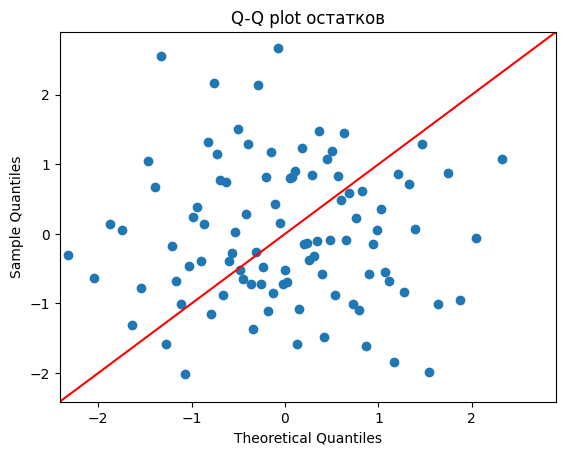

In [26]:
plt.figure(figsize=(10, 6))
sm.qqplot(residuals, line='45', fit=True)
plt.title('Q-Q plot остатков')
plt.show()

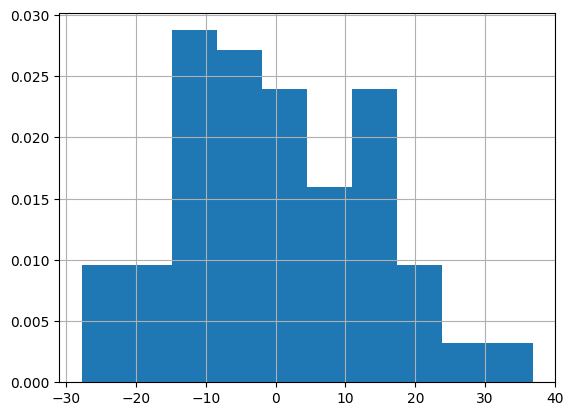

In [27]:
plt.hist(residuals, density=1)
plt.grid(1)
plt.show()

In [28]:
shapiro_test = sts.shapiro(residuals)
print(f"Shapiro-Wilk test: W = {shapiro_test[0]:.4f}, p-value = {shapiro_test[1]:.4f}")

Shapiro-Wilk test: W = 0.9832, p-value = 0.2515


In [29]:
Z = list(zip(X, Y))
Z = sorted(Z, key=lambda x: x[0])
X_1 = [x for x, y in Z]  
Y_1 = [y for x, y in Z]

In [30]:
"Группированные данные"
x = [round(np.mean(X_1[i : i + 5]), 4) for i in range(0, 50, 5)]
data = {x[i]: Y_1[5 * i: 5 * i + 5] for i in range(10)}
data

{np.float64(1.7567): [array([17.1131737]),
  array([11.42349492]),
  array([-2.81511543]),
  array([2.73692012]),
  array([-2.31482808])],
 np.float64(2.4857): [array([0.44714167]),
  array([6.15021669]),
  array([9.46618544]),
  array([5.66030278]),
  array([6.84162059])],
 np.float64(3.1605): [array([1.88699163]),
  array([5.88509359]),
  array([1.48493715]),
  array([18.43745405]),
  array([-4.07079096])],
 np.float64(3.6799): [array([5.96207297]),
  array([7.6722264]),
  array([11.44297205]),
  array([21.53565544]),
  array([13.54995276])],
 np.float64(4.1151): [array([19.10608302]),
  array([0.5250871]),
  array([1.0917239]),
  array([-4.10379865]),
  array([12.29739422])],
 np.float64(4.7786): [array([16.66214036]),
  array([18.36753466]),
  array([11.91715772]),
  array([5.67809069]),
  array([17.69329148])],
 np.float64(5.3404): [array([30.7067284]),
  array([13.52141242]),
  array([24.4976364]),
  array([16.28114036]),
  array([17.24787124])],
 np.float64(6.0803): [array([18.1

In [31]:
X = np.array([[xi] for xi in data for _ in range(len(data[xi]))])
Y = np.array([yi for xi in data for yi in data[xi]])

model1 = LinearRegression()
model1.fit(X, Y)

a = model1.coef_[0]  # Наклон (коэффициент при X)
b = model1.intercept_  # Свободный член
print(a, b)

[4.92202433] [-7.69990779]


Параметры регрессии группированной и негруппированной выборки практически свопадают

In [32]:
# Средние для каждой группы
group_means = [np.mean(y_list) for y_list in data.values()]
# Все Y
Y = np.concatenate(list(data.values()))
# Общее среднее
global_mean = np.mean(Y)

In [33]:
Qp = np.sum(5 * (group_means - global_mean)**2)

Qe = 0
for xi, yi_list in data.items():
    group_mean = np.mean(yi_list)
    Qe += np.sum((yi_list - group_mean)**2)

print(f"Qp = {Qp:.2f}")
print(f"Qe = {Qe:.2f}")

Qp = 4192.82
Qe = 1845.15


In [34]:
df_1 = 17 # 19 - 2
df_2 = 76 # 95 - 19

F_stat = (Qe / df_1) / (Qp / df_2)
alpha = 0.05
F_crit = sts.f.ppf(1 - alpha, df_1, df_2)

print(f"F-статистика = {F_stat:.2f}")
print(f"Критическое F (α=0.05) = {F_crit:.2f}")


F-статистика = 1.97
Критическое F (α=0.05) = 1.76


Гипотеза об адекватности линейной регрессии отвергнута

In [35]:
np.mean(res)

np.float64(-6.344707119367121e-13)

In [36]:
np.mean(residuals)

np.float64(1.0987774264331447e-15)

Обе модели не очень хорошо описывают зависимость, но квадратичная модель все-таки предпочтительнее, т.к. остатки квадратичной модели лучше удовлетворяют нормальному закону (p-value в тесте Шапиро больше), математическое ожидание этих ошибок ближе к нулю и их дисперсия меньше, чем у ошибок линейной регрессионной модели 